# Code the naive Bayes classifier using sklearn

In [33]:
import pandas as pd
data = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\gene data.csv")
data


,sample,gene a,gene b,gene c,gene d,class
0,1,1,1,1,0,normal
1,2,1,1,1,1,normal
2,3,0,1,1,0,tumor
3,4,2,0,1,0,tumor
4,5,2,2,0,0,tumor
5,6,2,2,0,1,normal
6,7,0,2,0,1,tumor
7,8,1,0,1,0,normal
8,9,1,2,0,0,tumor
9,10,2,0,0,0,tumor


In [34]:
x = data.drop(["class"],axis=1)
y = data['class']

In [35]:
y

0      normal
1      normal
2       tumor
3       tumor
4       tumor
5      normal
6       tumor
7      normal
8       tumor
9       tumor
10      tumor
11      tumor
12      tumor
13     normal
14    unknown
Name: class, dtype: object

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

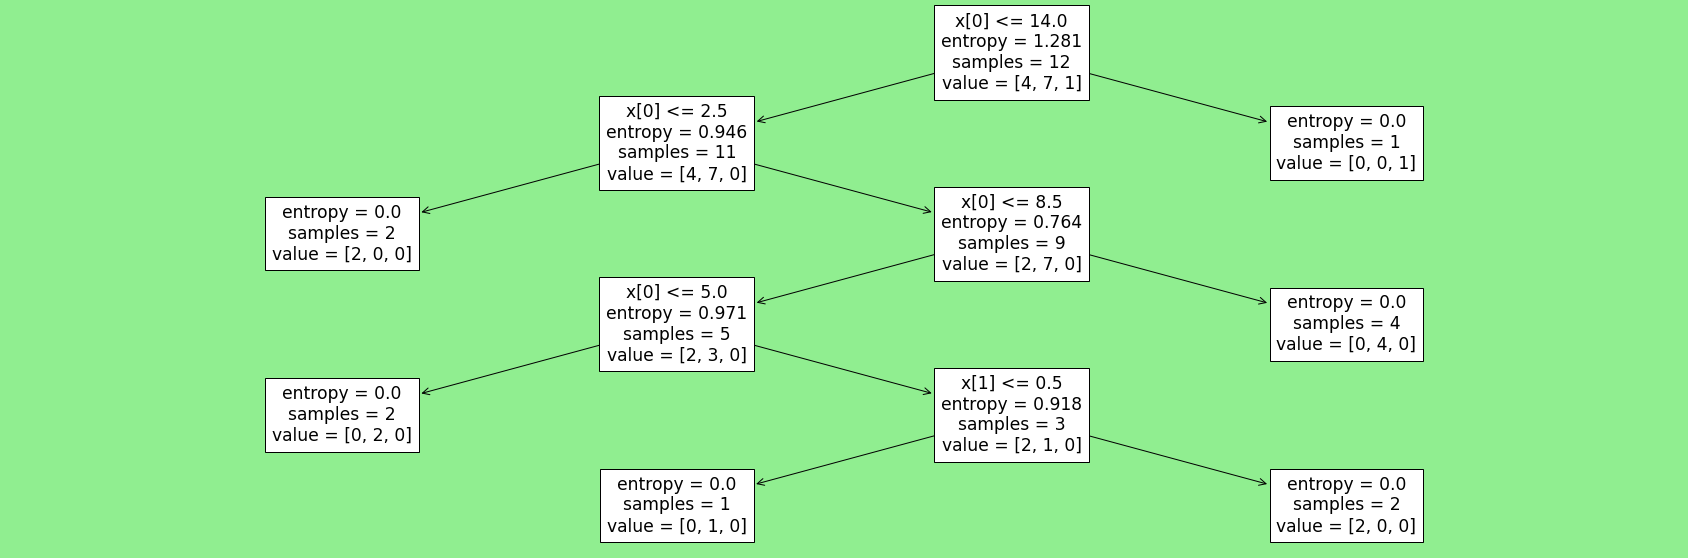

In [46]:
# plotting decision tree
from sklearn.tree import DecisionTreeClassifier
dts_entropy = DecisionTreeClassifier(criterion = 'entropy')
dts_entropy.fit(x_train, y_train)
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10), facecolor ='lightgreen')
a = tree.plot_tree(dts_entropy)
plt.show()

In [38]:
#Building a MultinomialNB Classifier model using training subset and then testing the effectiveness of model on test set.
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

ML = MultinomialNB()
ML.fit(x_train, y_train)
predicted = ML.predict(x_test)
predicted

array(['tumor', 'tumor', 'tumor'], dtype='<U7')

In [39]:
# finding accuracy
score = accuracy_score(y_test, predicted)
print('Accuracy Score: \n', (100*score))

Accuracy Score: 
 66.66666666666666


In [47]:
y_pred=dts_entropy.predict(x_test)
s=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
confusion_matrix_entropy = pd.crosstab(s['y_test'], s['y_pred'])
print (confusion_matrix_entropy)

y_pred  tumor
y_test       
normal      1
tumor       2


[Text(0.5, 24.0, 'Actual Values'),
 Text(69.0, 0.5, 'Predicted Values'),
 Text(0.5, 1.0, 'CONFUSION MATRIX')]

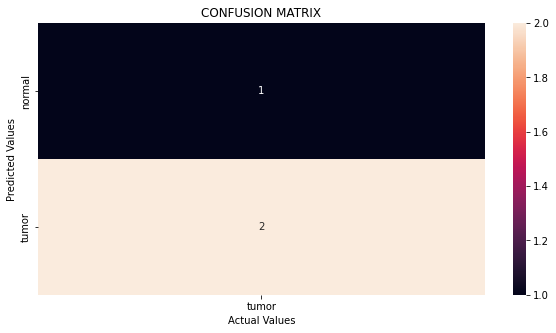

In [48]:
fig=plt.figure(figsize=(10,5))
import seaborn as sn
mapp=sn.heatmap(confusion_matrix_entropy,annot=True)
mapp.set(xlabel='Actual Values',ylabel='Predicted Values',title='CONFUSION MATRIX')

In [51]:
# find precision,recall and f1_score 
for i in range(confusion_matrix_entropy.shape[0]):
    tp=confusion_matrix_entropy.iloc[i,i]
    fp=confusion_matrix_entropy.iloc[i,:].sum()-tp
    fn=confusion_matrix_entropy.iloc[:,i].sum()-tp
    tn=confusion_matrix_entropy.sum().sum()-tp-fp-fn
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1_score=2*(precision*recall)/(precision+recall)
    print('for class {} is:'.format(confusion_matrix_entropy.index[i]),'Precision is:',precision,', Recall is:' ,recall,', f1_score is:', f1_score)

for class normal is: Precision is: 1.0 , Recall is: 0.3333333333333333 , f1_score is: 0.5


IndexError: single positional indexer is out-of-bounds

# Code the naive Bayes classifier from scratch

In [52]:
x_train,y_train = data.iloc[:14,:5],data.iloc[:15,5]
x_train,y_train

(    sample  gene a  gene b  gene c  gene d
 0        1       1       1       1       0
 1        2       1       1       1       1
 2        3       0       1       1       0
 3        4       2       0       1       0
 4        5       2       2       0       0
 5        6       2       2       0       1
 6        7       0       2       0       1
 7        8       1       0       1       0
 8        9       1       2       0       0
 9       10       2       0       0       0
 10      11       1       0       0       1
 11      12       0       0       1       1
 12      13       0       1       0       0
 13      14       2       0       1       1,
 0      normal
 1      normal
 2       tumor
 3       tumor
 4       tumor
 5      normal
 6       tumor
 7      normal
 8       tumor
 9       tumor
 10      tumor
 11      tumor
 12      tumor
 13     normal
 14    unknown
 Name: class, dtype: object)

In [53]:
x_test = data.iloc[14,:5]
x_test

sample    15
gene a     1
gene b     2
gene c     1
gene d     1
Name: 14, dtype: object

In [54]:
# probability of tumor and normal
a = 0
b = 0
for i in range(len(data)):
    if y_train[i] == "normal" :
        a+=1
    else:
        b+=1
print('P(Normal): ',a/len(x_train))
print('P(Tumor): ',b/len(x_train))

P(Normal):  0.35714285714285715
P(Tumor):  0.7142857142857143


In [55]:
w,x,y,z,s,n=0,0,0,0,0,0
for i in range(data.shape[1]):
    l = len(data)
    for j in range(len(data)):
        if y_train[j]=='normal':
            if x_train[:,i][j]==1:
                w+=1
            elif x_train[:,i][j]==0:
                x+=1
            elif x_train[:,i][j]==-1:
                y+=1
        elif y_train[j]=='tumor':
            if x_train[:,i][j]==1:
                z+=1
            elif x_train[:,][j]==0:
                s+=1
            elif x_train[:,i][j]==-1:
                n+=1

TypeError: '(slice(None, None, None), 0)' is an invalid key